### data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [4]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

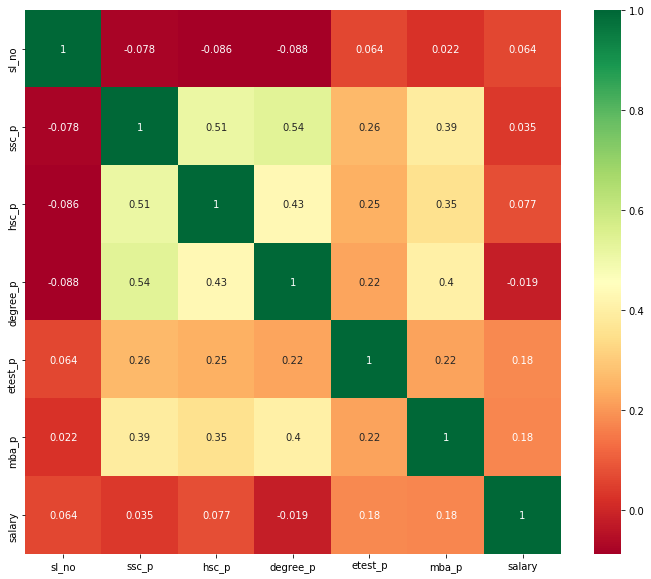

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap ='RdYlGn')

In [6]:
data.drop(['sl_no'],inplace=True,axis=1)

In [7]:
np.unique(data['ssc_b'])

array(['Central', 'Others'], dtype=object)

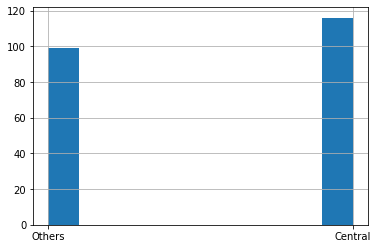

In [8]:
data['ssc_b'].hist()

In [9]:
np.unique(data['hsc_b'])

array(['Central', 'Others'], dtype=object)

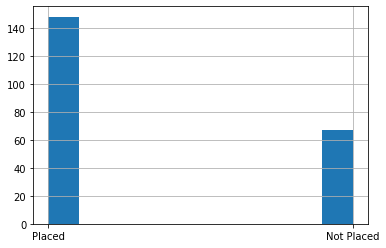

In [10]:
data['status'].hist()

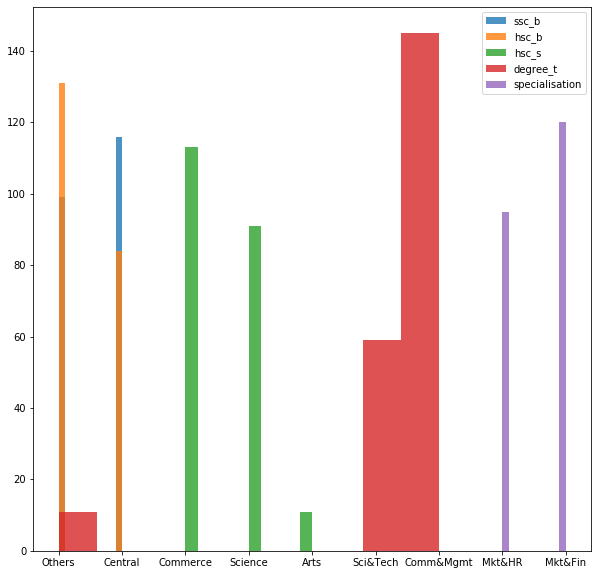

In [11]:
plt.figure(figsize=(10,10))

columns=['ssc_b','hsc_b','hsc_s','degree_t','specialisation']
for column in columns:
    plt.hist(data[column],label=column,alpha=0.8)
plt.legend(loc='upper right')
plt.show()

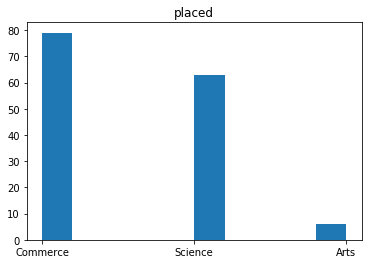

In [12]:
def placed_plot(df,column):
    plt.title('placed')
    df1=data[data['status']=='Placed'][column]
   

    plt.hist(df1)
placed_plot(data,'hsc_s')   

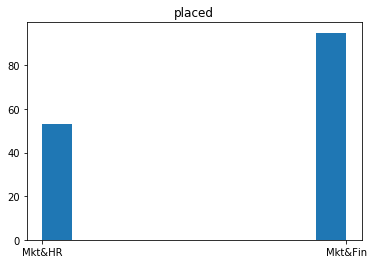

In [13]:
placed_plot(data,'specialisation')   

In [14]:
bins=np.arange(0,215)

In [15]:
data[data['status']=='Placed']

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [16]:
data2=data.drop(['hsc_b','ssc_b'],axis=1)


In [17]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in['gender','hsc_s','degree_t','workex','specialisation','status']:
    
    data2[col]=le.fit_transform(data2[col])
data2

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,NaN
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1,204000.0


#### placement classification

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
Y=data2['status'].values
x=data2.drop(['status','salary'],axis=1)

In [20]:
x

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23


In [21]:
for col in ['hsc_s','degree_t']:

    dummies=pd.get_dummies(x[col])
    x=pd.concat([x.drop([col],axis=1),dummies.drop([0],axis=1)],axis=1)
x

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,1,2,1,2
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,1,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,0,0,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,1,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,1,0,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,0,1,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,1,0,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,1,0,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[1.        , 0.53823954, 0.88962109, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.79241394, 0.68088962, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.49701093, 0.5107084 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.53823954, 0.49423394, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.68253968, 0.47775947, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43516801, 0.34596376, ..., 1.        , 0.        ,
        0.        ]])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=0)


In [24]:
x_train.shape

(150, 12)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def best_model(x,y):
    algos={
        'randomforest':{
            'model':RandomForestClassifier(),
            'params':{'n_estimators':[100,200,300]}
                            },
        'decision_tree':{
            'model':DecisionTreeClassifier(),
            'params':{
                'criterion':['gini','entropy'],
                'splitter':['best','random']
            }
        },
        'Knearestneighbor':{
            'model':KNeighborsClassifier(),
            'params':{
                'n_neighbors':[3,5,6,9,12],
                'weights':['uniform','distance'],
                'algorithm':['auto','ball_tree','kd_tree','brute']
            }
        },
        'logisticRegression':{
            'model':LogisticRegression(),
            'params':{
                'penalty':['l1','l2']
                
            }
        }
    }
    scores=[]
    CV=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
    for model,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=CV,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':model,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [26]:
best_model(x,Y)

,model,best_score,best_params
0,randomforest,0.846154,{'n_estimators': 200}
1,decision_tree,0.803077,"{'criterion': 'entropy', 'splitter': 'random'}"
2,Knearestneighbor,0.821538,"{'algorithm': 'auto', 'n_neighbors': 9, 'weigh..."
3,logisticRegression,0.858462,{'penalty': 'l2'}


In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
importance = model.coef_
importance

array([[ 0.3974738 ,  3.40986089,  2.02455914,  1.95645014,  1.04477268,
        -0.45589327, -0.43324919, -0.74863112, -0.16331568,  0.11342573,
        -0.45362183, -0.47841696]])

In [29]:
y_pred=model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score





cm=confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[11,  8],
       [ 2, 44]], dtype=int64)

In [32]:
accuracy_score(y_pred,y_test)

0.8461538461538461

### salary prediction regression

In [20]:
reg_data=data2.dropna()
reg_data.drop(['status'],axis=1,inplace=True)

reg_data.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [21]:
reg_data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,250000.0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,425000.0
7,1,82.00,64.00,2,66.00,2,1,67.0,0,62.14,252000.0


In [22]:
y=reg_data.salary
x=reg_data.drop(['salary'],axis=1)
x

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50
7,1,82.00,64.00,2,66.00,2,1,67.0,0,62.14
...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,72.00,1,65.00,0,0,67.0,0,56.49
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72


In [23]:
y_modified=y/100000
y_modified

0      2.70
1      2.00
2      2.50
4      4.25
7      2.52
       ... 
209    2.16
210    4.00
211    2.75
212    2.95
213    2.04
Name: salary, Length: 148, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV,ShuffleSplit

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y_modified,test_size=0.2,random_state=0)
y_train

53     4.50
114    2.50
27     2.65
183    2.76
90     3.00
       ... 
15     2.00
143    3.00
96     3.00
163    5.00
70     3.60
Name: salary, Length: 118, dtype: float64

In [27]:
def best_model(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{'n_estimators':[100,150,200,300]
                     }
        }
            
        
        
    }
    scores=[]
    CV=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
    for model,info in algos.items():
        gsCV=GridSearchCV(info['model'],info['params'],cv=CV,return_train_score=False)
        gsCV.fit(x,y)
        scores.append({
            'model':model,
            'best_score':gsCV.best_score_,
            'best_params':gsCV.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [81]:
best_model(x,y_modified)

,model,best_score,best_params
0,linear_regression,-0.107398,{'normalize': False}
1,lasso,-0.094238,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,-2.127920,"{'criterion': 'mse', 'splitter': 'random'}"
3,random_forest,-0.349092,{'n_estimators': 150}


In [38]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred=reg.predict(x_test)

In [40]:
mean_absolute_error(y_pred,y_test)

0.6762577831108662

In [41]:
pd.concat([pd.DataFrame(y_pred,columns=['predicted_value']),pd.DataFrame(y_test.values,columns=['true_value'])],axis=1)

,predicted_value,true_value
0,2.747453,3.20
1,2.762363,2.50
2,2.930043,3.60
3,2.626251,3.00
4,2.654715,2.87
5,3.334608,4.11
6,2.758051,2.40
7,3.566471,2.70
8,2.330093,3.00
9,3.302507,2.40


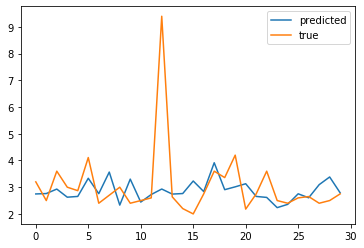

In [46]:
plt.plot(np.arange(0,30),y_pred,label='predicted')
plt.plot(np.arange(0,30),y_test,label='true')
plt.legend(loc='upperright')